# **Lab 4**

## Data Wrangling

In this lab, you will learn various ways of manipulating (including some cleaning) data such as merging data, duplicate removal, addressing missing data and transformation functions and mappings. You will also go through two sample use cases using car price data and minimum wage data, and proceed to apply some of these techniques learned earlier. Finally, the processed data is turned into some simple descriptive analytics to churn out meaningful insights from visualizations.

> **Credit note:** A portion of this lab was adapted from [this fantastic tutorial](https://lectures.quantecon.org/py/pandas_panel.html) from QuantEcon and `prakharrathi25`'s [Kaggle kernel](https://www.kaggle.com/prakharrathi25/data-wrangling/) on data wrangling.

In [2]:
import numpy as np
import pandas as pd

<hr>

Let's have a look at a classic dataset from UCI Machine Learning called the [Automobile Dataset](https://archive.ics.uci.edu/ml/datasets/automobile) which was later re-shared at Kaggle [here](https://www.kaggle.com/rickyrrii/old-car-price-data). This dataset is notoriously famous for being incomplete and noisy at best. In order for this data to be used for building a decent regression model (that is, a model that can predict car prices given a bunch of attributes), the data needs to be properly cleaned.

The dataset is in the `.txt` file while the other `.names` file (open in any text editor) contains information of what are the attributes (columns) of the dataset.

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data.txt', names=cols)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, there are some question marks appearing in the dataframe, and those are basically missing data that may hinder our further analysis.

### Cleaning Missing Data

Pandas uses the floating point value '**NaN**' (Not a Number) to represent missing data in both floating and non-floating point arrays. It also has its use as a sentinel that can be easily detected:

Here are some NaN handling methods: `dropna`, `fillna`, `isnull`, `notnull`

On a Series, it returns the Series with only the non-null data and index values:

In [4]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
print(data)

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64


To simplify the use of `np.nan`, we can fix an alias `NA` for easy use:

In [5]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
print(data)

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64


With DataFrames, you may want to drop rows or columns which are all NA or just those containing any NAs. `dropna` by default drops any row containing a missing value:

In [6]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
print(data)

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


In [7]:
print(data.dropna()) 

     0    1    2
0  1.0  6.5  3.0


This seems so "strict"... As long as there is a single NaN, the row will be dropped.

Passing `how='all'` will only drop rows that are all NA (watch row 2):

In [8]:
print(data.dropna(how='all'))

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0


> **Note**: `axis=0` is default, that is row-wise, using `axis=1` indicate column-wise. Dropping columns in the same way is only a matter of passing `axis=1`. 

In [9]:
data[4] = NA
print(data)

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN


In [10]:
print(data.dropna(axis=1, how='all')) #drop column where the values are NA

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the "holes" in several ways.

Calling `fillna` with a constant replaces missing values with that value:

In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
print(data)
print()
print(data.fillna(0))   # fill with 0 , should be data = data.fillna(0), can be filled with column wise only

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

     0    1    2
0  1.0  6.5  3.0
1  1.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  6.5  3.0


Calling `fillna` with a dict, you can use a different fill value for each column. The keys in the dict denotes the column index, while its corresponding value denotes the replacement value.

In [12]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
print(data)
print()
print(data.fillna({1: 0.5, 2: -1}))   # fill in column 1 with 0.5 and column 2 with -1

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

     0    1    2
0  1.0  6.5  3.0
1  1.0  0.5 -1.0
2  NaN  0.5 -1.0
3  NaN  6.5  3.0


You can fill NA with the mean value of the data (can be either a good intuitive approach or a totally bad approach sometimes...)

In [13]:
data = pd.Series([1., NA, 3.5, NA, 7])
print(data.fillna(data.mean()))

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64


### Cleaning Duplicated Data

The DataFrame method `duplicated()` returns a boolean Series indicating whether each row is a duplicate or not. Relatedly, `drop_duplicates()` returns a DataFrame without the duplicated entries (which are True).

In [14]:
#remove duplicates
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
'k2': [1, 4, 2, 3, 3, 4, 1]})

print(data)
print(data.duplicated())
print()
print(data.drop_duplicates())

    k1  k2
0  one   1
1  one   4
2  one   2
3  two   3
4  two   3
5  two   4
6  two   1
0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

    k1  k2
0  one   1
1  one   4
2  one   2
3  two   3
5  two   4
6  two   1


---
OK. Going back to the Automobile data, you can choose to convert the "?" symbols to NaN (which allow us to use those functions just now)

In [15]:
cars = cars.replace("?", NA)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, to quickly get the big picture of the condition of the data, we can try to find out how many NaNs are there in each of these columns. Remember: indices of a dataframe refer to the columns, so applying a function to a dataframe will be effective on the columns first.

In [16]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on this summary, we can see that `normalized-loss` attribute has the most NaN values, while there are a few others also have incomplete data.

In [17]:
cars.dtypes     # this shows all the data types within the dataframe

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Numeric operations such as mean or max cannot be applied to object types. Take this example:

In [18]:
cars["horsepower"].mean()
# try this as well:
cars["horsepower"].max()
#object is treated as a string

TypeError: can only concatenate str (not "int") to str

The right way to handle this is to force the conversion to numeric on a specific series. 

In [ ]:
print(cars["horsepower"].dtype)
hp_num = pd.to_numeric(cars["horsepower"], errors='coerce')#if one of the data is in string form, it will chnage to NAN
print(hp_num.dtype)
print(hp_num.mean())

**Q1**: Replace the NaN data in `normalized-loss`, `peak-rpm`, `horsepower`, `bore`, `stroke` with their respective mean values.

In [19]:
# fill in here
# 1. covert the object data type to numeric
# 2. derive the mean for each of the respective columns
# 3. replace NaN with mean
cars[['normalized-losses','peak-rpm','horsepower','bore','stroke']] = \
cars[['normalized-losses','peak-rpm','horsepower','bore','stroke']].apply(pd.to_numeric,errors='coerce')
print(cars.mean(numeric_only=True))
cars.fillna(cars.mean(numeric_only=True),inplace=True)
cars

# note: Pandas cannot convert NaN to integer or floats, so to solve this
# we need to convert the dataframe to numeric with errors=coerce option
# after that, we can safely compute the mean, ignoring those 

symboling               0.834146
normalized-losses     122.000000
wheel-base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb-weight          2555.565854
engine-size           126.907317
bore                    3.329751
stroke                  3.255423
compression-ratio      10.142537
horsepower            104.256158
peak-rpm             5125.369458
city-mpg               25.219512
highway-mpg            30.751220
dtype: float64


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


Check again...

In [20]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

So we have not tackled the missing values in `num-of-doors` which appears to be a category, which is a string.

Naively, we can replace the missing values with the most frequently appearing category. 

In [21]:
cars["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Use the `idxmax()` function to directly pull out the value that corresponds to the item with the max value count. 

In [22]:
cars["num-of-doors"].value_counts().idxmax()

'four'

Then, go ahead and replace the missing `num-of-doors` value by the most frequent value "four".

In [23]:
cars["num-of-doors"].replace(NA, "four", inplace=True) 
# inplace=True allows replacement to take place in the dataframe itself

cars.isnull().sum()    # check again

C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_29472\2095832183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars["num-of-doors"].replace(NA, "four", inplace=True)


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

**Q2**: Drop all rows that do not have the price data. **Hint**: Use dropna(), specify which column to operate on with `subset` parameter

In [24]:
# fill in here
cars.dropna(subset=['price'],inplace=True)
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Verify**: The data should have 201 rows after all the cleaning is done.

In [25]:
cars.shape

(201, 26)

In [26]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Notice from the data type printout above, some attributes have incorrect data types. This will cause problems in further processing that requires values to be numerical.To convert them into the appropriate data types:

In [27]:

cars[["normalized-losses"]] = cars[["normalized-losses"]].astype("int")
cars[["price"]] = cars[["price"]].astype("float")
cars[["horsepower"]] = cars[["horsepower"]].astype("int")

cars.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

With all these steps, the data should now be clean and ready for further processing!

### Data Normalization

Sometimes, you may want to normalize numeric data to reap its benefits during data modeling. Pandas does not have a normalize function, so you can either compute a normalization operation on the column itself, or you get Numpy's help to normalize values in the column. Typically, most normalizations want to scale the numeric values to a standard range (between 0 and 1 for e.g.), or to scale values according to the distribution such that the variance = 1 and average = 0.

The car lengths looked like this:

In [28]:
cars['length'] 

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 201, dtype: float64

Normalizing by the maximum value is quite easy. Just divide all values by the max!

In [29]:
cars['length']/cars['length'].max()

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 201, dtype: float64

This gives us an idea of how far is the relative length of each car from the length of the longest car.

To directly replace the values in that column and also in the `width` and `height` columns:

In [30]:
# make a deep copy - separate copy from the original cars2 = cars would not work, it's a shallow copy
cars2 = cars.copy()

In [31]:
cars2['length'] = cars['length']/cars['length'].max()
cars2['width'] = cars['width']/cars['width'].max()
cars2['height'] = cars['height']/cars['height'].max()

In [32]:
# check
cars2[["length", "width", "height"]] 

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
200,0.907256,0.956944,0.928094
201,0.907256,0.955556,0.928094
202,0.907256,0.956944,0.928094
203,0.907256,0.956944,0.928094


A more common way of normalizing is to use both the minimum and maximum to adjust the values. This is called a min-max normalization.

$$\hat{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$$ 

**Q3**: Compute the z-normalized value for `engine-size` and replace its values in `cars2` dataframe.

$$\hat{x} = \frac{x-\mu}{\sigma}$$ 

In [33]:
# fill in here

from scipy.stats import zscore
numeric_cols = cars2.select_dtypes(include=[np.number]).columns
print(numeric_cols)
print(cars2[numeric_cols].apply(zscore))



Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
     symboling  normalized-losses  wheel-base    length     width    height  \
0     1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081   
1     1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081   
2     0.127193           0.000000   -0.710103 -0.244152 -0.185597 -0.559713   
3     0.926121           1.315931    0.165748  0.195176  0.148335  0.218425   
4     0.926121           1.315931    0.099646  0.195176  0.243744  0.218425   
..         ...                ...         ...       ...       ...       ...   
200  -1.470664          -0.845956    1.702619  1.187733  1.436357  0.709881   
201  -1.470664          -0.845956    1.702619  1.187733  1.388653  0.709881   
202  -1.470664          -0.845

### Data Transformation

One of the methods that we have learned is **binning**, a process of grouping or categorizing numeric data into discrete "bins" or distinct baskets, which is one of the ways of dealing with noisy data.

In this data, `horsepower` is a real valued variable ranging from 48 to 288, it has 57 unique values in total. What if we only care about the price difference between cars with "high" horsepower, "medium" horsepower, and "low" horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

In [37]:
cars2["horsepower"].dtype

dtype('int64')

To get an idea of how the values are distributed, use matplotlib library to plot its histogram:

In [39]:
%pip install matplotlib

  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 493.7 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.2 MB 493.7 kB/s eta 0:00:04
   --------- ------------------------------ 0.5/2.2 MB 493.7 kB/s eta 0:00:04
   --------- ---

Text(0.5, 1.0, 'horsepower bins')

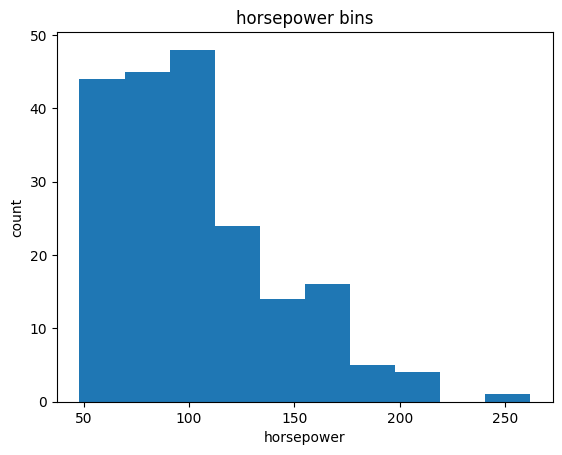

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(cars2["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

We want 3 bins of equal size so we can use Numpy's `linspace(start_value, end_value, numbers_generated)` function. To build 3 bins, we need to define 4 dividers or boundaries:

In [42]:
bins = np.linspace(min(cars2["horsepower"]), max(cars2["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

Let's create the bin group names.

In [43]:
group_names = ['Low', 'Medium', 'High']

We can now apply the pandas function `cut` to determine what each value of horsepower belongs to:

In [44]:
cars2['horsepower-binned'] = pd.cut(cars2['horsepower'], bins, labels=group_names, include_lowest=True )

In [45]:
cars2[['horsepower','horsepower-binned']].head(15)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


In [46]:
cars2["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Let's plot the distribution of the bins.

Text(0.5, 1.0, 'Horsepower Bins')

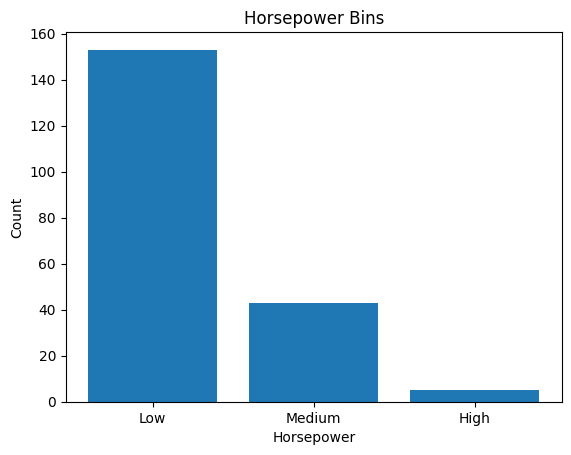

In [47]:
plt.bar(group_names, cars2["horsepower-binned"].value_counts())

# set x/y labels and plot title 
plt.xlabel('Horsepower')
plt.ylabel("Count")
plt.title("Horsepower Bins")

In [48]:
# check the dataframe again, you should see the new horsepower-binned column right at the end
cars2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low


If you are satisfied with the data you have cleaned so far, you can save it into a CSV file and store it away for later use.

In [49]:
# Convert to CSV file
cars2.to_csv('car_data_CLEANED.csv')

## Use Case: OECD Minimum Wage Data

Let's try our hand at another dataset containing the minimum wages collected from the [OECD](https://en.wikipedia.org/wiki/OECD) group of 32 countries.  

The dataset in CSV has been provided: `oecd_minwage.csv`.

In [50]:
wage = pd.read_csv('oecd_minwage.csv')

Let's have a look at the dataframe (show first 5 frames):

In [51]:
wage.head(30)

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.44300
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.91800
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.40600
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.13900
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.83200
5,5,2011-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18284.29900
6,6,2012-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17979.94300
7,7,2013-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17890.01000
8,8,2014-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17854.87500
9,9,2015-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17907.63700


The current data condition is difficult to anlayze since there are several dimentions to the data, and that each of these dimensions seemed to be in different formats.

Let's have a peek at various portions of the data. (Note: In pandas, `iloc` method allows direct positional access, just like how we would do for a numpy array.)

In [52]:
wage.iloc[7:11, 1:5]

,Time,Country,Series,Pay period
7,2013-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual
8,2014-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual
9,2015-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual
10,2016-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual


In [53]:
wage.iloc[260:264, 1:5]

,Time,Country,Series,Pay period
260,2013-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly
261,2014-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly
262,2015-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly
263,2016-01-01,New Zealand,In 2015 constant prices at 2015 USD exchange r...,Hourly


It appears that we have rows further down that belong to a different country, but contain the same 'Time' attribute. There are also information representing different 'Pay period'.

If we were to analyze all these data based on the 'Time' (in other words, the year of the data), then we need to re-organize the data a little. This is where a **pivot table** comes into play. A pivot table performs some summarization or re-organization of the data into a more compact looking table so that it can be meaningfully interpreted or used further for visualization purposes.

We will use `pivot_table` to create a wide format panel, with a `MultiIndex` to handle higher dimensional data. `pivot_table` arguments should specify the data (values), the index, and the columns we want in our resulting dataframe

By passing a list in columns, we can create a MultiIndex in our column axis.

In [55]:
wage_pt = wage.pivot_table(values='value',
                        index='Time',                                 # this is the new index of the pivot table
                        columns=['Country', 'Series', 'Pay period'])  # this specifies grouped columns with multiple indices 
wage_pt.head()

Country                                   Australia            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                20410.652  10.33073   
2007-01-01                                21087.568  10.67106   
2008-01-01                                20718.238  10.48298   
2009-01-01                                20984.768  10.61966   
2010-01-01                                20879.332  10.57090   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          23826.637  12.060   
2007-01-01                                          24616.844  12.457   
2008-01-01                                          24185.703  12.237   
2009-01-01                                          24496.838  12.397   
2010-01-01                                          24373.756  12.340   

Country                                     Belgium            \
Series     In 2015 constant prices at 2015 USD PPPs             
Pay period                                   Annual    Hourly   
Time                                                            
2006-01-01                                21042.279  10.08859   
2007-01-01                                21310.053  10.21730   
2008-01-01                                21416.957  10.26877   
2009-01-01                                22140.191  10.61538   
2010-01-01                                21810.281  10.45718   

Country                                                                \
Series     In 2015 constant prices at 2015 USD exchange rates           
Pay period                                             Annual  Hourly   
Time                                                                    
2006-01-01                                          20228.742   9.699   
2007-01-01                                          20486.162   9.822   
2008-01-01                                          20588.934   9.872   
2009-01-01                                          21284.205  10.205   
2010-01-01                                          20967.053  10.053   

Country                                      Brazil         ...  \
Series     In 2015 constant prices at 2015 USD PPPs         ...   
Pay period                                   Annual Hourly  ...   
Time                                                        ...   
2006-01-01                                3310.5120   1.41  ...   
2007-01-01                                3525.4519   1.50  ...   
2008-01-01                                3664.3911   1.56  ...   
2009-01-01                                3934.7710   1.68  ...   
2010-01-01                                4145.6851   1.80  ...   

Country                                                Turkey         \
Series     In 2015 constant prices at 2015 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2006-01-01                                          4741.1650  2.273   
2007-01-01                                          4710.4160  2.258   
2008-01-01                                          4635.1650  2.222   
2009-01-01                                          4753.9048  2.279   
2010-01-01                                          4799.2778  2.301   

Country                              United Kingdom           \
Series     In 2015 constant prices at 2015 USD PPPs            
Pay period                                   Annual   Hourly   
Time                                                           
200

To more easily filter our time series data later on, we will convert the index into a [`DateTimeIndex`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html).

In [56]:
wage_pt.index = pd.to_datetime(wage_pt.index)
type(wage_pt.index)

pandas.core.indexes.datetimes.DatetimeIndex

The columns contain multiple levels of indexing, known as a `MultiIndex`, with levels being ordered hierarchically (Country > Series > Pay period). This is known as "concept hierarchy generation".

A `MultiIndex` is the simplest and most flexible way to manage panel data in pandas

In [57]:
type(wage_pt.columns)

pandas.core.indexes.multi.MultiIndex

In [58]:
wage_pt.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

Like before, we can select the country (the top level of our MultiIndex):

In [59]:
wage_pt['Japan'].head()

Series     In 2015 constant prices at 2015 USD PPPs           \
Pay period                                   Annual   Hourly   
Time                                                           
2006-01-01                                13082.115  6.28948   
2007-01-01                                13215.890  6.35379   
2008-01-01                                13315.404  6.40164   
2009-01-01                                13781.248  6.62560   
2010-01-01                                14112.379  6.78480   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          11836.640  5.691  
2007-01-01                                          11957.679  5.749  
2008-01-01                                          12047.718  5.792  
2009-01-01                                          12469.213  5.995  
2010-01-01                                          12768.818  6.139

Here's a nifty trick if you need to look at the pivot table in a different way. "Stacking" and "unstacking" levels of the `MultiIndex` can be used to reshape the dataframe into a desired format.

`stack()` rotates the lowest level of the column `MultiIndex` to the row index, while `unstack()` works in the opposite direction (try it out).

In [63]:
wage_pt.stack().head()

C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_29472\1514834133.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  wage_pt.stack().head()


Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  20410.65200   
           Hourly                                     10.33073   
2007-01-01 Annual                                  21087.56800   
           Hourly                                     10.67106   
2008-01-01 Annual                                  20718.23800   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23826.637   
           Hourly                                                 12.060   
2007-01-01 Annual                                              24616.844   
           Hourly                                                 12.457   
2008-01-01 Annual                                              24185.703   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  21042.27900   
           Hourly                                     10.08859   
2007-01-01 Annual                                  21310.05300   
           Hourly                                     10.21730   
2008-01-01 Annual                                  21416.95700   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20228.742   
           Hourly                                                  9.699   
2007-01-01 Annual                                              20486.162   
           Hourly                                                  9.822   
2008-01-01 Annual                                              20588.934   

Country                                                 Brazil  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    3310.5120   
           Hourly                                       1.4100   
2007-01-01 Annual                                    3525.4519   
           Hourly                                       1.5000   
2008-01-01 Annual                                    3664.3911   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              2032.8730   
           Hourly                                                 0.8700   
2007-01-01 Annual                                              2164.8611   
           Hourly                                                 0.9200   
2008-01-01 Annual                                              2250.1780   

Country                                                 Canada  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                  13649.68900   
           Hourly                                      6.56235   
2007-01-01 Annual                                  13785.93500   
           Hourly                                      6.62785   
2008-01-01 Annual                                  14342.76200   

Country                                                  

We can also pass in an argument to select the level we would like to stack (notice how it also auto-sorts that level in order)...

In [64]:
wage_pt.stack(level='Country').head(30)

C:\Users\tiagrajah.MYAGR-LPWIN-072\AppData\Local\Temp\ipykernel_29472\2796845354.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  wage_pt.stack(level='Country').head(30)


Series                        In 2015 constant prices at 2015 USD PPPs  \
Pay period                                                      Annual   
Time       Country                                                       
2006-01-01 Australia                                        20410.6520   
           Belgium                                          21042.2790   
           Brazil                                            3310.5120   
           Canada                                           13649.6890   
           Chile                                             5201.6479   
           Colombia                                          6257.7632   
           Czech Republic                                    7991.7749   
           Estonia                                           5179.6499   
           France                                           19295.8260   
           Greece                                           13672.2750   
           Hungary                                           7211.1138   
           Ireland                                          17132.4430   
           Israel                                           11428.6940   
           Japan                                            13082.1150   
           Korea                                            10106.7510   
           Latvia                                            3216.4021   
           Lithuania                                         5336.2148   
           Luxembourg                                       21639.1230   
           Mexico                                            1797.1790   
           Netherlands                                      21681.6580   
           New Zealand                                      15566.1180   
           Poland                                            7104.0459   
           Portugal                                          9067.2871   
           Russian Federation                                1365.3500   
           Slovak Republic                                   6210.7881   
           Slovenia                                         11273.0490   
           Spain                                            11740.0590   
           Turkey                                            8491.3682   
           United Kingdom                                   16764.9690   
           United States                                    12594.3970   

Series                                   \
Pay period                       Hourly   
Time       Country                        
2006-01-01 Australia           10.33073   
           Belgium             10.08859   
           Brazil               1.41000   
           Canada               6.56235   
           Chile                2.22000   
           Colombia             2.14000   
           Czech Republic       3.98087   
           Estonia              2.48333   
           France              10.60213   
           Greece               5.61873   
           Hungary              3.47191   
           Ireland              8.23675   
           Israel               5.12204   
           Japan                6.28948   
           Korea                3.72668   
           Latvia               1.54211   
           Lithuania            2.69131   
           Luxembourg          10.42540   
           Mexico               0.86403   
           Netherlands          9.62567   
           New Zealand          7.48742   
           Poland               3.40605   
           Portugal             3.72628   
           Russian Federation   0.56110   
           Slovak Republic      2.48699   
           Slovenia             5.40484   
           Spain                4.82443   
           Turkey               4.07120   
           United Kingdom       8.06794   
           United States        6.05500   

Series                        In 2015 constant prices at 2015 USD exchange rates  \
Pay period                                           

To create a filtered dataframe that only takes the hourly minimum wages across countries and time, we can use the `xs()` method to select a cross-section of the data, taking values at lower levels in the multi-index, while keeping the higher levels (countries in this case)

In [65]:
wage_f = wage_pt.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                     level=('Pay period', 'Series'), 
                     axis=1 )
wage_f.head()

Country,Australia,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Estonia,France,...,New Zealand,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,12.060,9.699,0.87,6.892,1.42,1.01,NaN,2.274,1.651,10.119,...,8.436,1.686,2.786,0.234,1.501,3.921,3.992,2.273,9.806,6.055
2007-01-01,12.457,9.822,0.92,6.961,1.45,1.02,NaN,2.292,1.858,10.227,...,8.993,1.713,2.840,0.448,1.637,3.877,4.097,2.258,10.070,6.241
2008-01-01,12.237,9.872,0.96,7.242,1.44,1.01,NaN,2.155,2.035,10.245,...,9.287,1.979,2.926,0.393,1.714,3.965,4.139,2.222,10.045,6.781
2009-01-01,12.397,10.205,1.03,7.670,1.52,1.04,NaN,2.133,2.036,10.426,...,9.534,2.160,3.117,0.662,1.883,4.079,4.317,2.279,10.148,7.579
2010-01-01,12.340,10.053,1.08,7.944,1.56,1.06,NaN,2.102,1.978,10.351,...,9.552,2.174,3.244,0.619,1.961,4.809,4.304,2.301,9.960,7.880


Now, this filtered dataframe looks good to be used for some analysis and visualizations.

### Grouping and Summarizing data

Grouping and summarizing data can be particularly useful for understanding large panel datasets. A simple way is to call an aggregation method on the dataframe, such as `.mean()` or `.max()` which is really quick and easy.

For example, we can calculate the average real minimum wage for each country over the period 2006 to 2016 (the default is to aggregate over rows since rows typically constitute data samples)

In [66]:
wage_f.mean()

Country
Australia             12.513909
Belgium                9.939000
Brazil                 1.090909
Canada                 7.819364
Chile                  1.619091
Colombia               1.070909
Costa Rica             2.533333
Czech Republic         2.154182
Estonia                2.076727
France                10.421273
Germany                9.404500
Greece                 4.110000
Hungary                1.904182
Ireland                9.700182
Israel                 5.954000
Japan                  6.179000
Korea                  4.224273
Latvia                 1.797091
Lithuania              1.728727
Luxembourg            11.944909
Mexico                 0.532545
Netherlands            9.642909
New Zealand            9.541545
Poland                 2.243364
Portugal               3.095000
Russian Federation     0.532364
Slovak Republic        1.922000
Slovenia               4.602636
Spain                  4.155818
Turkey                 2.459364
United Kingdom         9.922818


Using this, we can now plot the average minimum wage over a 10-year period (2006-2016) for each OECD country.

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib


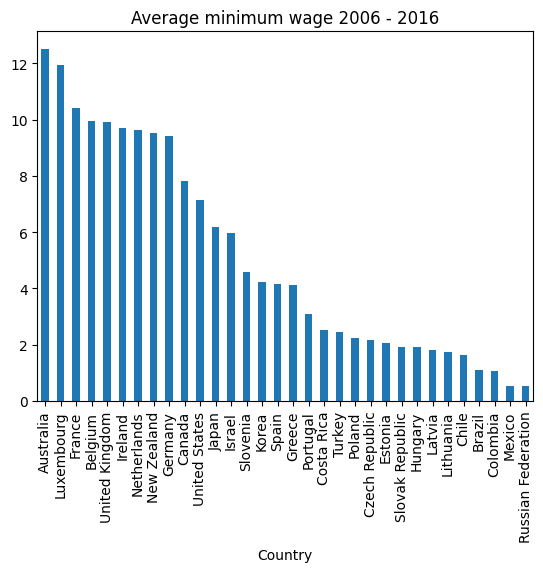

In [68]:
# plotting can be done directly on the dataframe using
wage_f.mean().sort_values(ascending=False).plot(kind='bar', title="Average minimum wage 2006 - 2016")

#Set country labels
country_labels = wage_f.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

**Q4**: Figure out how to aggregate over columns, giving the average minimum wage for all countries over the time period. (Hint: the `axis` by default is aggregating over rows).This is what we call a *time series* graph, data over time. 

In [70]:
# write your code here
